# Data preparation

## Load the data

In [176]:
import pandas as pd

Load transaction data

In [177]:
transact_data = pd.read_csv("./data/QVI_transaction_data.csv")

Load customer data

In [178]:
cust_data = pd.read_csv("./data/QVI_purchase_behaviour.csv")

## Transaction data

In [179]:
transact_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [180]:
transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [181]:
transact_data.isna().sum().sum()

0

So there are zero null values.

### Chaging the date format

In [182]:
transact_data["DATE"] = pd.to_datetime(transact_data["DATE"], unit="D", origin='1899-12-30')

In [183]:
transact_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Categorical values

`PROD_NAME` (product name) contains categorical values.

In [184]:
transact_data["PROD_NAME"].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

There are 114 types of chips products.

Changing the `PROD_NAME` type to category.

In [185]:
transact_data["PROD_NAME"] = transact_data["PROD_NAME"].astype("category")

`STORE_NBR` (store number) is also a categorical column.

In [186]:
transact_data["STORE_NBR"].value_counts()

STORE_NBR
226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
252       2
206       2
92        1
76        1
Name: count, Length: 272, dtype: int64

In [187]:
transact_data["STORE_NBR"] = transact_data["STORE_NBR"].astype("category")

In [188]:
transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  category      
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  category      
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(4)
memory usage: 12.9 MB


### Outliers detection

In [189]:
import seaborn as sns

<AxesSubplot: xlabel='TOT_SALES'>

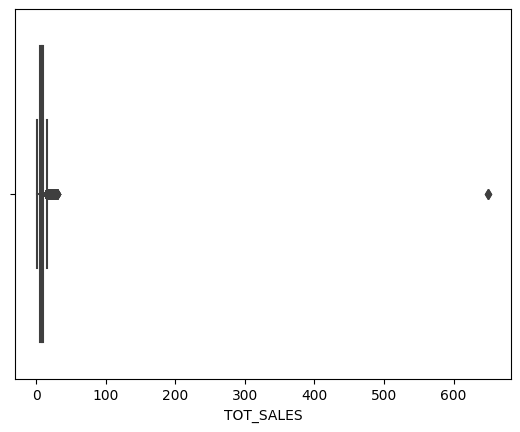

In [190]:
sns.boxplot(data=transact_data, x=transact_data["TOT_SALES"])

Using the boxplot we can identify that observations with TOT_SALES greater than 600 can be considered outliers

In [191]:
len(transact_data[transact_data["TOT_SALES"] >= 600])

2

<AxesSubplot: xlabel='PROD_QTY'>

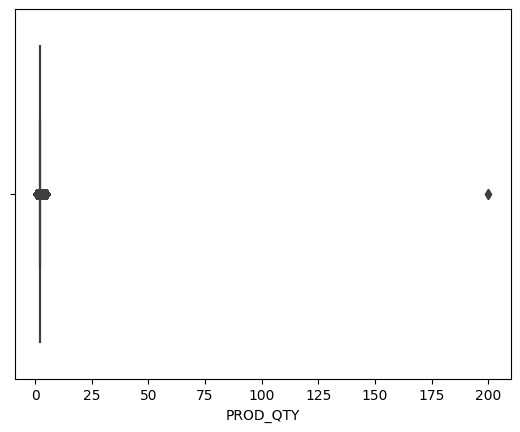

In [192]:
sns.boxplot(data=transact_data, x=transact_data["PROD_QTY"])

Observations with `PROD_QTY` greater than 200 can be considered outliers

In [193]:
len(transact_data[transact_data["PROD_QTY"] >= 200])

2

Removing outliers

In [194]:
transact_data = transact_data[~(transact_data["TOT_SALES"] >= 600)]
transact_data = transact_data[~(transact_data["PROD_QTY"] >= 200)]

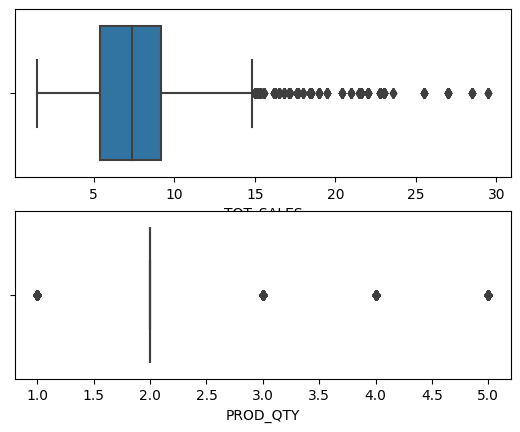

In [195]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

sns.boxplot(data=transact_data, x=transact_data["TOT_SALES"], ax=ax[0])
sns.boxplot(data=transact_data, x=transact_data["PROD_QTY"], ax=ax[1])

plt.show()